<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/ZProMax/feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Name| Matrix Number | Task |
|----------|----------|----------|
| NG SUANG JOO | A21EC0102 | Assignment 4 |
| LING WAN YIN | A21EC0047 | Assignment 3 |
| FONG KHAH KHEH | A21EC0026 | Assignment 5 |


#**Dataset: New York Bus Rides Service**
Company offers rides on fixed routes (defined count and location of stations) at different tmes of the day. The customer books any one of these rides based on their needs (travel time, distance, price etc.). We are constantly trying to improve our offerings from a product, operations, growth side to improve our conversion through a very data driven approach.

The customer lands on the home screen and then starts a search by entering a pickup and drop off location. The last step is when they click on the book button on the check-out page.

##**Dataset**
* **Search**

This file represents all the searches made on the platform for booking

1. session_id: Session of the search
2. search_id: Unique search in the session
3. user_id: ID of the user
4. search_city: City where the search happened
5. search_time: Local time of the search
6. num_of_results: Number of results returned for the search
7. is_result: Whether a search gave a result or not
8. median_pickup_walk_time: Estimated time taken by user to walk from his desired pickup to the bus station
9. median_dropoff_walk_time: Estimated time taken by user to walk from the bus station his desired destination
10. median_bus_travel_time: Estimated bus travel time
11. high_demand_val: Indicates very few seats left or that the bus is full
12. user_device_os: Platform of the mobile device
13. user_device_app_version: App version number



##**Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline


##**Sampling**
Random sample of 10% of dataset

In [ ]:
file = '/content/drive/My Drive/Datasets/newyorkbus/searches.csv'
n = sum(1 for line in open(file))-1
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(file, skiprows=skip)
df.head()

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
0,911ab421-5800-401f-8045-4427c51cc351,375890ed-3e8b-400f-b40b-bab770022e5b,5d6d32ebf321e600193e3d39,New York,2020-02-16 13:47:25.811 UTC,10,True,1020.0,1680.0,3673.0,0,ios,3390.0
1,ce7a234f-ddeb-4de0-844f-bcfd194ca1f5,aa82ffda-c53e-4e48-a39f-87c4df5d102c,5d8073b18743200019da237c,New York,2019-12-10 19:49:25.792 UTC,40,True,300.0,1860.0,1418.0,0,android,286.0
2,8bd1472e-404a-489f-a8aa-c4633d51929a,6ee93693-ff10-49d0-8f38-cc89ac6f0b18,59ddadd78f279c000f6e15b0,New York,2020-02-23 16:26:56.543 UTC,10,True,1080.0,1380.0,4376.5,0,ios,3390.0
3,711c199e-23e7-450a-8482-ee36b78bf291,6ea972a3-28d9-4bb6-9100-4acfba900af5,5ce898dfbcc3ed001a3de358,New York,2019-12-05 07:55:20.539 UTC,10,True,480.0,480.0,3939.5,0,android,284.0
4,3f2ea46a-a082-4eeb-9722-003e1461a10c,2ee71414-2596-43f8-b67d-0d2846d953bb,5ca5e5a87c646d001862a697,New York,2019-11-14 20:03:27.042 UTC,40,True,900.0,1320.0,3483.0,1,android,281.0


##**Exploratory Data Analysis(EDA)**

In [ ]:
df.columns

Index(['session_id', 'search_id', 'user_id', 'search_city', 'search_time',
       'num_of_results', 'is_result', 'median_pickup_walk_time',
       'median_dropoff_walk_time', 'median_bus_travel_time', 'high_demand_val',
       'user_device_os', 'user_device_app_version'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569933 entries, 0 to 569932
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                569933 non-null  object 
 1   search_id                 569933 non-null  object 
 2   user_id                   569933 non-null  object 
 3   search_city               569933 non-null  object 
 4   search_time               569933 non-null  object 
 5   num_of_results            569933 non-null  int64  
 6   is_result                 569933 non-null  bool   
 7   median_pickup_walk_time   437808 non-null  float64
 8   median_dropoff_walk_time  437808 non-null  float64
 9   median_bus_travel_time    447116 non-null  float64
 10  high_demand_val           569933 non-null  int64  
 11  user_device_os            569642 non-null  object 
 12  user_device_app_version   569642 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)


In [ ]:
df.describe()

,num_of_results,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_app_version
count,569933.000000,437808.000000,437808.000000,447116.000000,569933.000000,569642.000000
mean,14.916592,1450.340218,1071.285838,3206.170962,0.671347,848.746758
std,14.759258,2522.589509,2224.896520,1855.138579,1.658827,1184.477235
min,0.000000,0.000000,0.000000,57.500000,0.000000,44.000000
25%,7.000000,300.000000,300.000000,2046.000000,0.000000,279.000000
50%,10.000000,600.000000,570.000000,3025.500000,0.000000,286.000000
75%,25.000000,1260.000000,1020.000000,3932.500000,0.000000,291.000000
max,100.000000,65760.000000,76080.000000,27923.000000,10.000000,3390.000000


###**Check for missing values**

In [ ]:
df.shape

(569933, 13)

In [ ]:
df.isnull().sum()

session_id                       0
search_id                        0
user_id                          0
search_city                      0
search_time                      0
num_of_results                   0
is_result                        0
median_pickup_walk_time     132125
median_dropoff_walk_time    132125
median_bus_travel_time      122817
high_demand_val                  0
user_device_os                 291
user_device_app_version        291
dtype: int64

<Axes: >

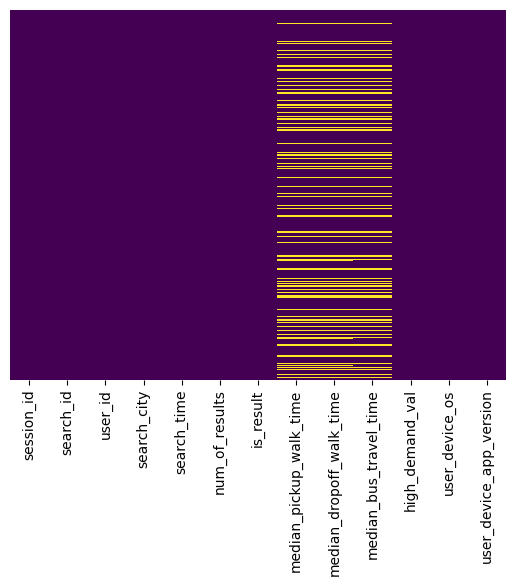

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

To handle the missing values, we can delete rows with the missing values.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

session_id                  0
search_id                   0
user_id                     0
search_city                 0
search_time                 0
num_of_results              0
is_result                   0
median_pickup_walk_time     0
median_dropoff_walk_time    0
median_bus_travel_time      0
high_demand_val             0
user_device_os              0
user_device_app_version     0
dtype: int64

In [ ]:
df.shape

(437558, 13)

What is the user device OS?

In [ ]:
df.user_device_os.value_counts()

android    350342
ios         86954
iOS           262
Name: user_device_os, dtype: int64

There is ios and iOS which should be the same thing but it comes out with different category, we can replace the iOS to become ios.

In [ ]:
df['user_device_os'].replace('iOS', 'ios', inplace=True)

In [ ]:
df.user_device_os.value_counts()

android    350342
ios         87216
Name: user_device_os, dtype: int64

In [ ]:
os = df.user_device_os.value_counts().index

In [ ]:
os_value = df.user_device_os.value_counts().values

([<matplotlib.patches.Wedge at 0x7e1d35233be0>,
 [Text(-0.8912889352619149, 0.6446735870808438, 'android'),
  Text(0.8912889352619148, -0.6446735870808439, 'ios')],
 [Text(-0.4861576010519535, 0.3516401384077329, '80.07%'),
  Text(0.48615760105195344, -0.35164013840773295, '19.93%')])

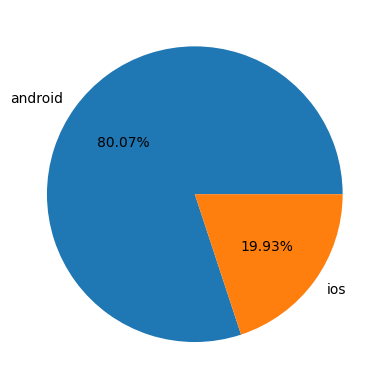

In [ ]:
##Pie Chart
fig_dims = (10, 6)
plt.pie(os_value, labels=os, autopct="%1.2f%%")

**The pie chart show that 80.06% of user use android devices, and 19.94% of user use ios devices**

###**Explore Numerical Variables**

In [ ]:
df.columns

Index(['session_id', 'search_id', 'user_id', 'search_city', 'search_time',
       'num_of_results', 'is_result', 'median_pickup_walk_time',
       'median_dropoff_walk_time', 'median_bus_travel_time', 'high_demand_val',
       'user_device_os', 'user_device_app_version'],
      dtype='object')

In [ ]:
version_category = df.groupby(['user_device_app_version', 'user_device_os']).size().reset_index().rename(columns={0:'user count'})

In [ ]:
pd.set_option('display.max_rows', None)
version_category

,user_device_app_version,user_device_os,user count
0,44.0,android,1
1,46.0,android,39
2,49.0,android,61
3,50.0,android,75
4,51.0,android,67
5,54.0,android,10
6,55.0,android,63
7,56.0,android,40
8,57.0,android,90
9,58.0,android,455


**There are 78505 users use the android version of 286.0**

**There are 24944 users use the ios version of 3390.0**

<Axes: xlabel='user_device_app_version', ylabel='user count'>

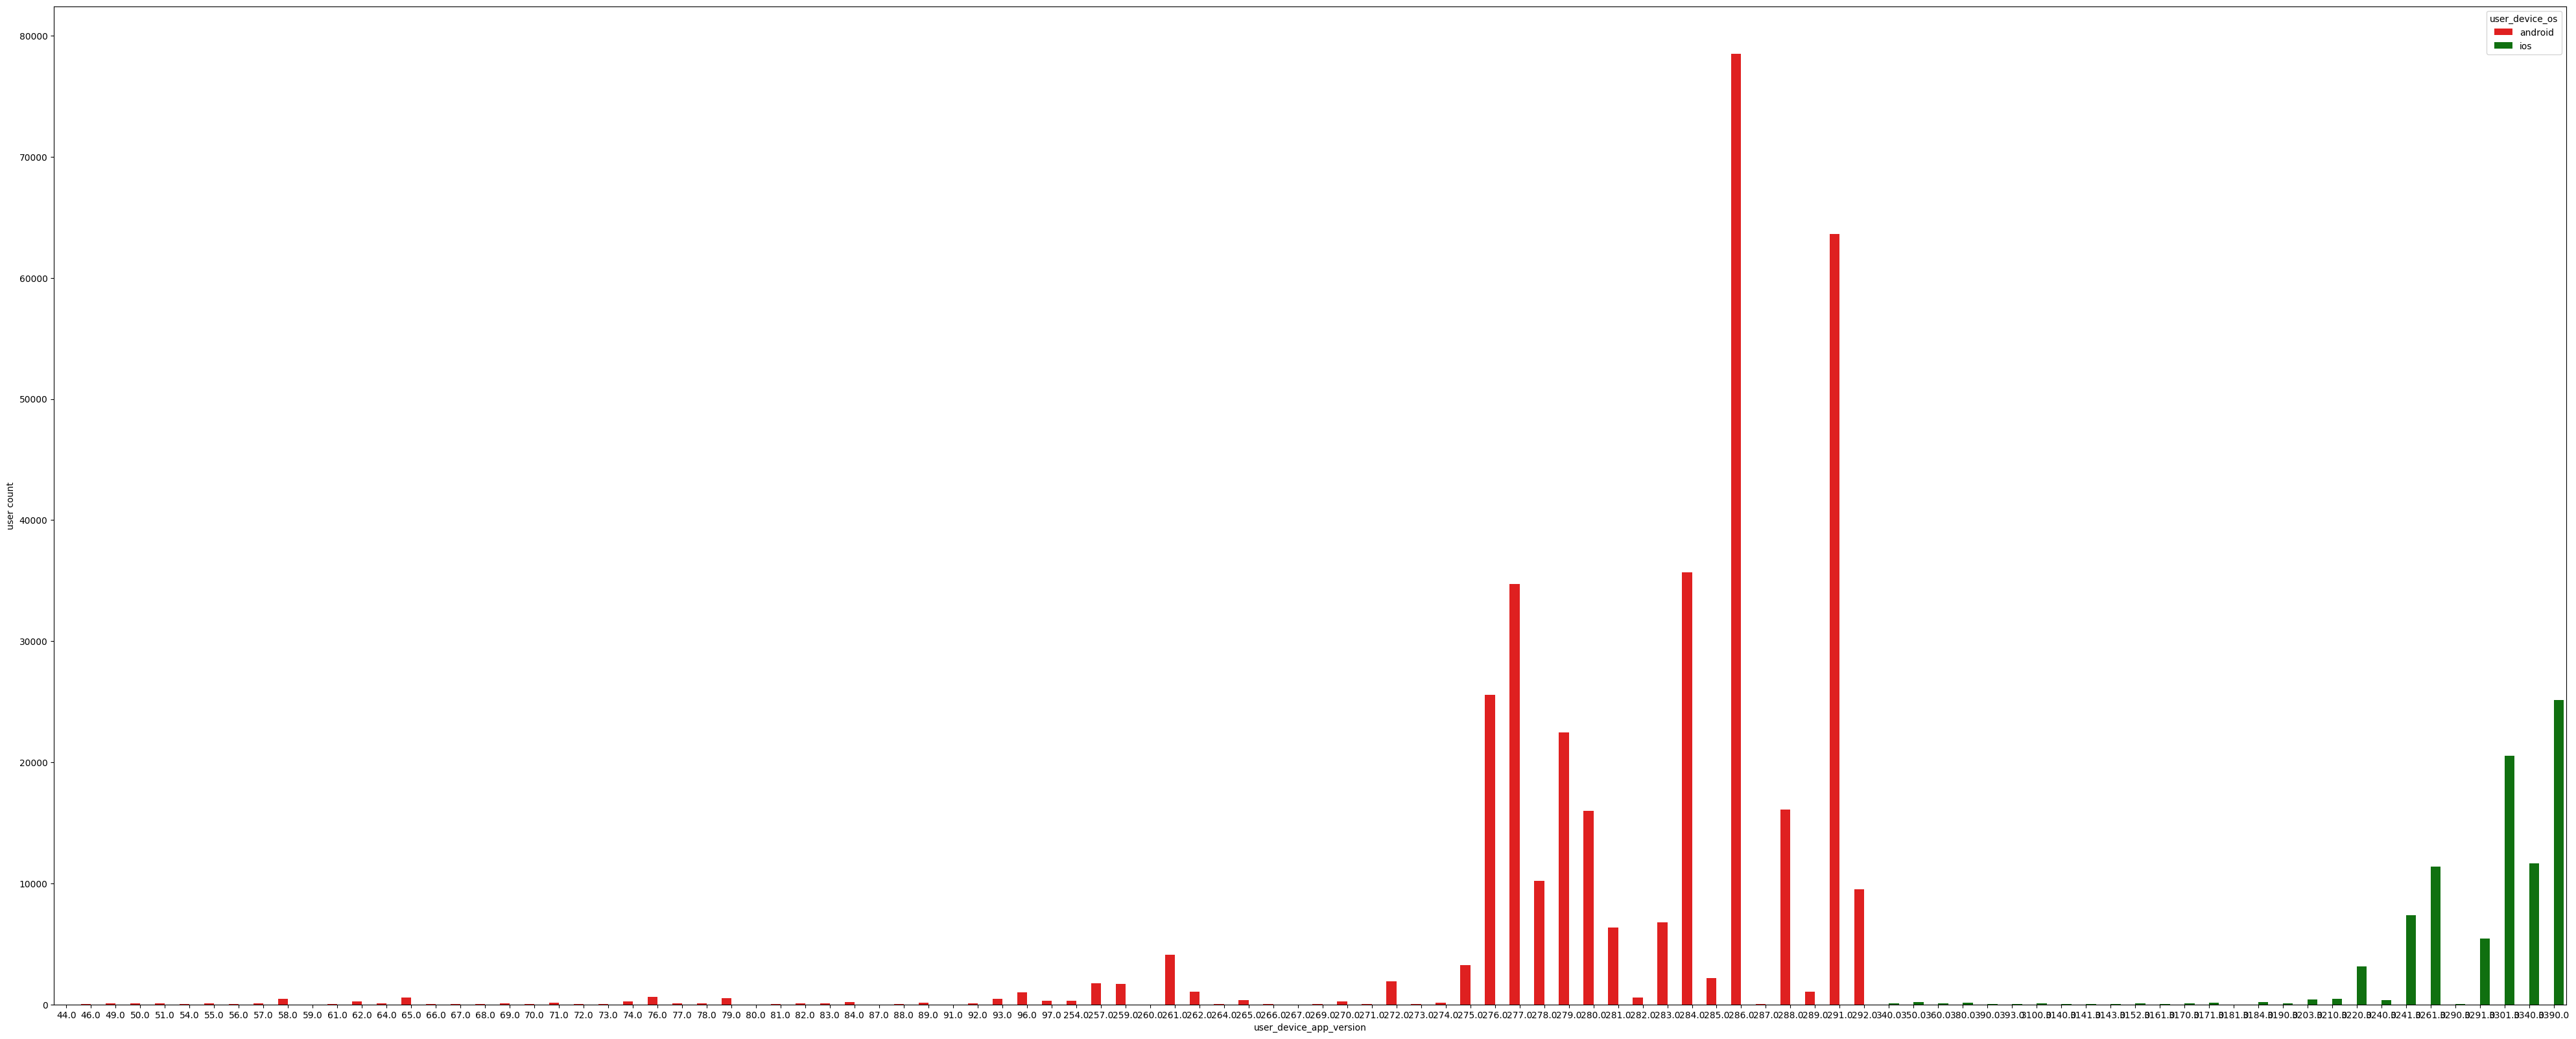

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50, 20)
sns.barplot(x="user_device_app_version", y="user count", hue='user_device_os', data = version_category, palette=['red', 'green'])

##**Feature Selection**

**Filter features by Correlation**

Since the column "is_result" is boolean data type, and the default value of heatmap is numeric_only, we can drop the feature and save it in a new dataframe containing only the numeric value.

<ipython-input-23-3c9bddae7265>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_bool.corr(), ax=ax)


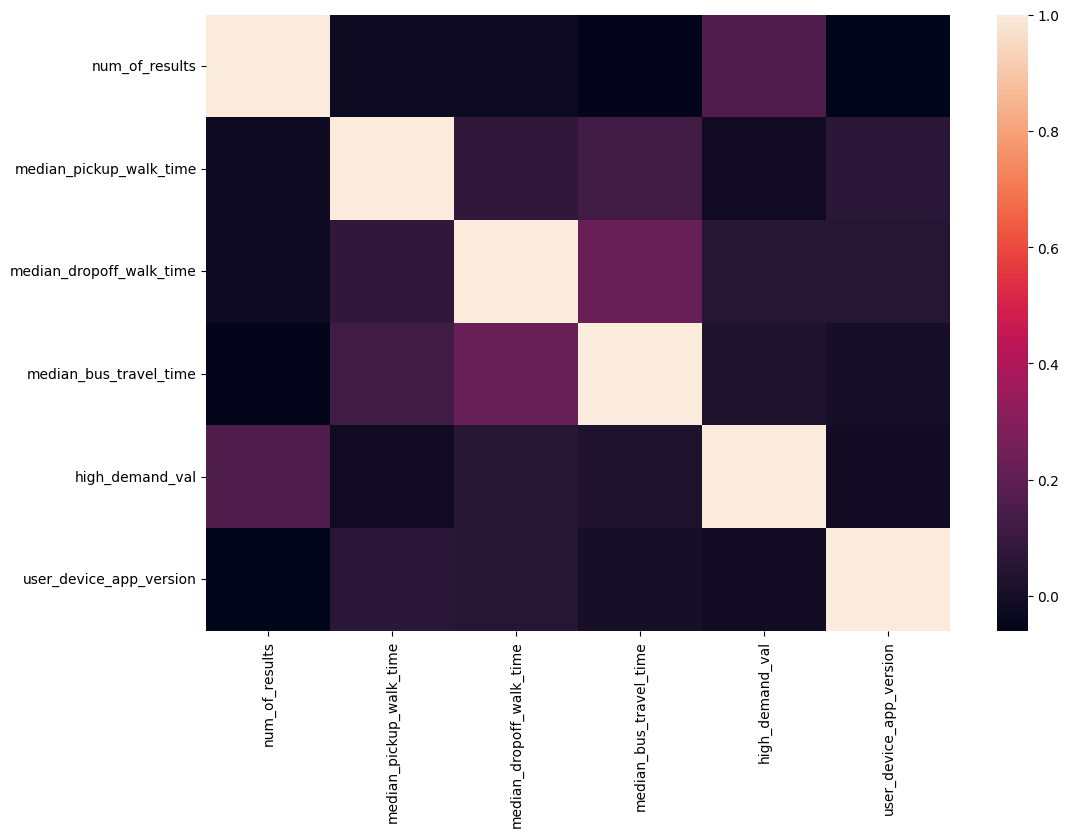

In [ ]:
df_copy = df.copy()
bool_col = df_copy.select_dtypes(include=bool).columns
df_no_bool = df_copy.drop(columns = bool_col)

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_no_bool.corr(), ax=ax)
plt.show()

In [ ]:
abs(df_no_bool.corr()["high_demand_val"])

<ipython-input-24-e1926fc73067>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df_no_bool.corr()["high_demand_val"])


num_of_results              0.157267
median_pickup_walk_time     0.013909
median_dropoff_walk_time    0.048582
median_bus_travel_time      0.026032
high_demand_val             1.000000
user_device_app_version     0.012354
Name: high_demand_val, dtype: float64

The correlation analysis reveals the relationship between the 'high_demand_val' column, indicating limited bus availability, and other features. Notably, 'num_of_results' shows a positive correlation (0.155831), suggesting a modest association with the number of available bus results. Additionally, 'median_pickup_walk_time' (0.013749), 'median_dropoff_walk_time' (0.047770), 'median_bus_travel_time' (0.028420), and 'user_device_app_version' (0.011027) exhibit relatively weak correlations with 'high_demand_val'. The strongest correlation is observed with 'num_of_results', implying a potential connection between bus availability and the quantity of search results.

##**Feature Preprocessing**

Handling outliers using the winsorization technique and normalizing the numeric features using StandardScaler.

<ipython-input-25-268365a9a57c>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_bool.corr(), ax=ax)


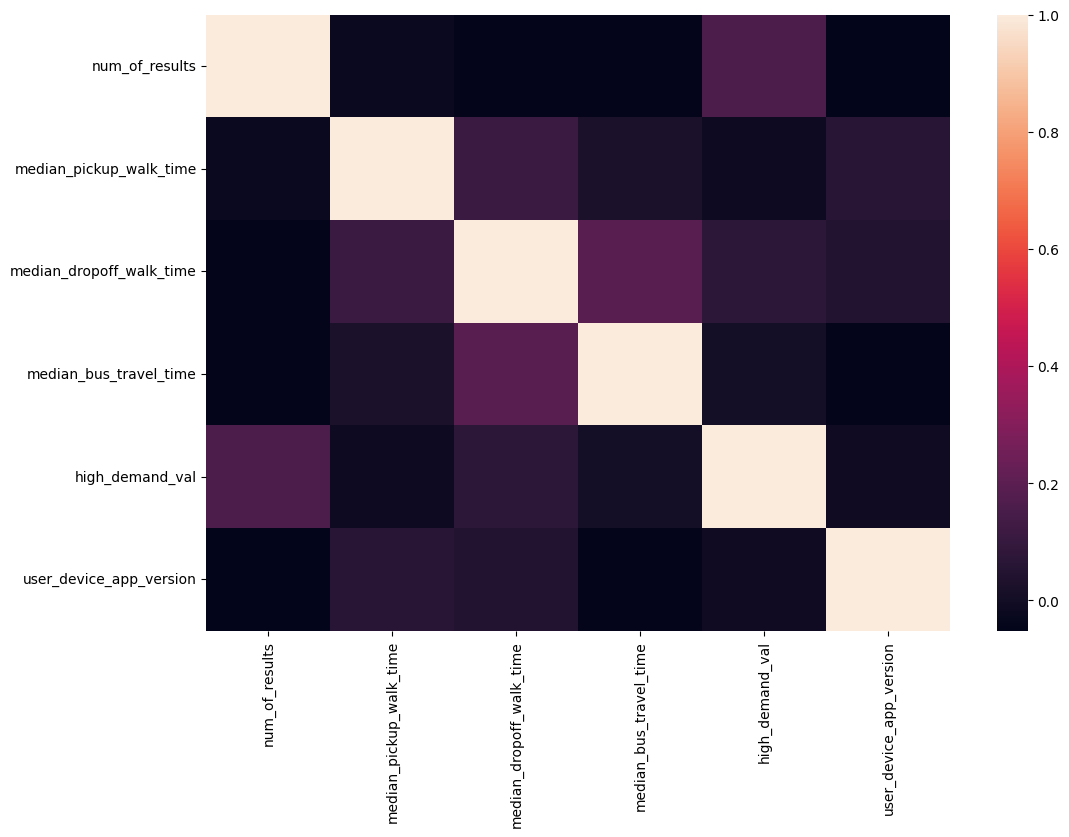

num_of_results              0.161151
median_pickup_walk_time     0.017008
median_dropoff_walk_time    0.074036
median_bus_travel_time      0.003224
high_demand_val             1.000000
user_device_app_version     0.007087
Name: high_demand_val, dtype: float64


<ipython-input-25-268365a9a57c>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target_after_preprocessing = abs(df_no_bool.corr()["high_demand_val"])


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats.mstats import winsorize

# Deal with outliers (using a simple example, you might need more sophisticated methods)
# For demonstration purposes, we'll winsorize the numeric features
numeric_features = df_no_bool.select_dtypes(include=[np.number]).columns
df_no_bool[numeric_features] = df_no_bool[numeric_features].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

# Normalize data using StandardScaler
scaler = StandardScaler()
df_no_bool[numeric_features] = scaler.fit_transform(df_no_bool[numeric_features])

# Check the correlation again after handling outliers and normalization
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_no_bool.corr(), ax=ax)
plt.show()

# Check correlation with the target variable again
correlation_with_target_after_preprocessing = abs(df_no_bool.corr()["high_demand_val"])
print(correlation_with_target_after_preprocessing)

The resulting correlation analysis reveals the correlation coefficients between 'high_demand_val' and other features after these preprocessing steps. Notably, the features 'num_of_results,' 'median_pickup_walk_time,' 'median_dropoff_walk_time,' and 'user_device_app_version' exhibit positive correlations, suggesting potential associations with the likelihood of high demand for bus seats.

##**Feature Transformation**

**Log Transformation**

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


   num_of_results  median_pickup_walk_time  median_dropoff_walk_time  \
0             NaN                -0.187859                  0.557156   
1        0.663949                -1.297382                  0.614547   
2             NaN                -0.146607                  0.435662   
3             NaN                -0.812884                 -0.781274   
4        0.663949                -0.280974                  0.405977   

   median_bus_travel_time  high_demand_val  user_device_app_version  
0                0.441813        -1.385421                 0.752659  
1               -1.215738        -1.385421                -1.149900  
2                0.958925        -1.385421                 0.752659  
3                0.637705        -1.385421                -1.160319  
4                0.302152         0.152040                -1.176220  


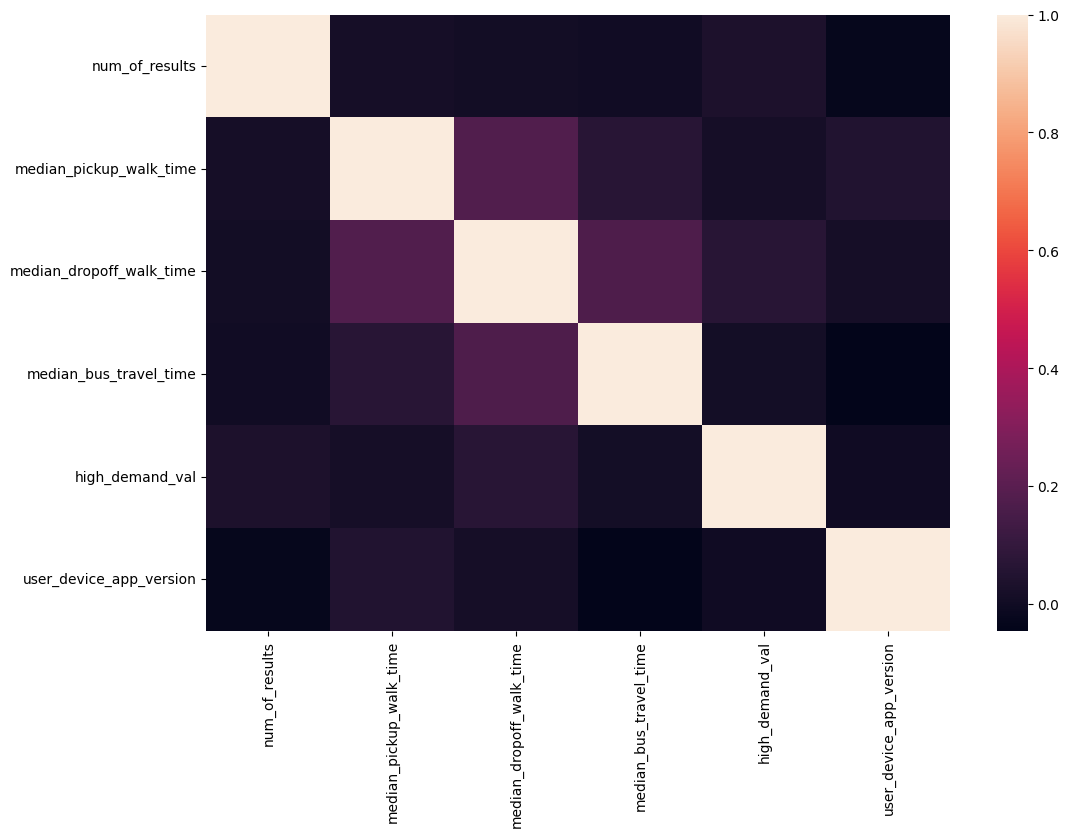

In [ ]:
from scipy.stats import skew
unwanted_columns = ['session_id', 'search_id', 'user_id', 'search_city', 'search_time', 'user_device_os']  # Replace with the actual column names you want to drop

# Drop unwanted columns
df_sample = df_no_bool.drop(columns=unwanted_columns)

# Select numeric features
num_features = df_sample.select_dtypes(include=[np.number]).columns

# Logarithmic transformation for skewed numeric features
skewed_features = df_sample[num_features].apply(lambda x: np.abs(skew(x)))  # Use absolute skewness
skewed_features = skewed_features[skewed_features > 0.5]  # Threshold for skewness

# Apply log transformation to skewed numeric features
df_sample[skewed_features.index] = np.log1p(df_sample[skewed_features.index])

# Check the transformed DataFrame
print(df_sample.head())

# Visualize the correlation after transformation
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_sample.corr(), ax=ax)
plt.show()


The transformation is applied to the columns 'num_of_results,' 'median_pickup_walk_time,' 'median_dropoff_walk_time,' 'median_bus_travel_time,' 'high_demand_val,' and 'user_device_app_version.'

**Positive values:** For values greater than 0, the logarithmic transformation compresses higher values more than lower values. This can help to make the distribution more symmetric and conform to assumptions of normality.

**Negative values or zero:** Logarithmic transformation is not defined for non-positive values. This is why NaN values might appear in the output for columns like 'num_of_results.'

##**Feature Creation**

In [ ]:
# Convert the search_time column to a pandas datetime object
df['timestamp'] = pd.to_datetime(df['search_time'])

In [ ]:
# Extract day of the week, month, and year features
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday is 0 and Sunday is 6
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

df.head()

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version,timestamp,day_of_week,month,year
0,911ab421-5800-401f-8045-4427c51cc351,375890ed-3e8b-400f-b40b-bab770022e5b,5d6d32ebf321e600193e3d39,New York,2020-02-16 13:47:25.811 UTC,10,True,1020.0,1680.0,3673.0,0,ios,3390.0,2020-02-16 13:47:25.811000+00:00,6,2,2020
1,ce7a234f-ddeb-4de0-844f-bcfd194ca1f5,aa82ffda-c53e-4e48-a39f-87c4df5d102c,5d8073b18743200019da237c,New York,2019-12-10 19:49:25.792 UTC,40,True,300.0,1860.0,1418.0,0,android,286.0,2019-12-10 19:49:25.792000+00:00,1,12,2019
2,8bd1472e-404a-489f-a8aa-c4633d51929a,6ee93693-ff10-49d0-8f38-cc89ac6f0b18,59ddadd78f279c000f6e15b0,New York,2020-02-23 16:26:56.543 UTC,10,True,1080.0,1380.0,4376.5,0,ios,3390.0,2020-02-23 16:26:56.543000+00:00,6,2,2020
3,711c199e-23e7-450a-8482-ee36b78bf291,6ea972a3-28d9-4bb6-9100-4acfba900af5,5ce898dfbcc3ed001a3de358,New York,2019-12-05 07:55:20.539 UTC,10,True,480.0,480.0,3939.5,0,android,284.0,2019-12-05 07:55:20.539000+00:00,3,12,2019
4,3f2ea46a-a082-4eeb-9722-003e1461a10c,2ee71414-2596-43f8-b67d-0d2846d953bb,5ca5e5a87c646d001862a697,New York,2019-11-14 20:03:27.042 UTC,40,True,900.0,1320.0,3483.0,1,android,281.0,2019-11-14 20:03:27.042000+00:00,3,11,2019


These time-based features can be particularly useful for understanding how patterns vary over different days, months, or years in your time series data.

##**Visualization**

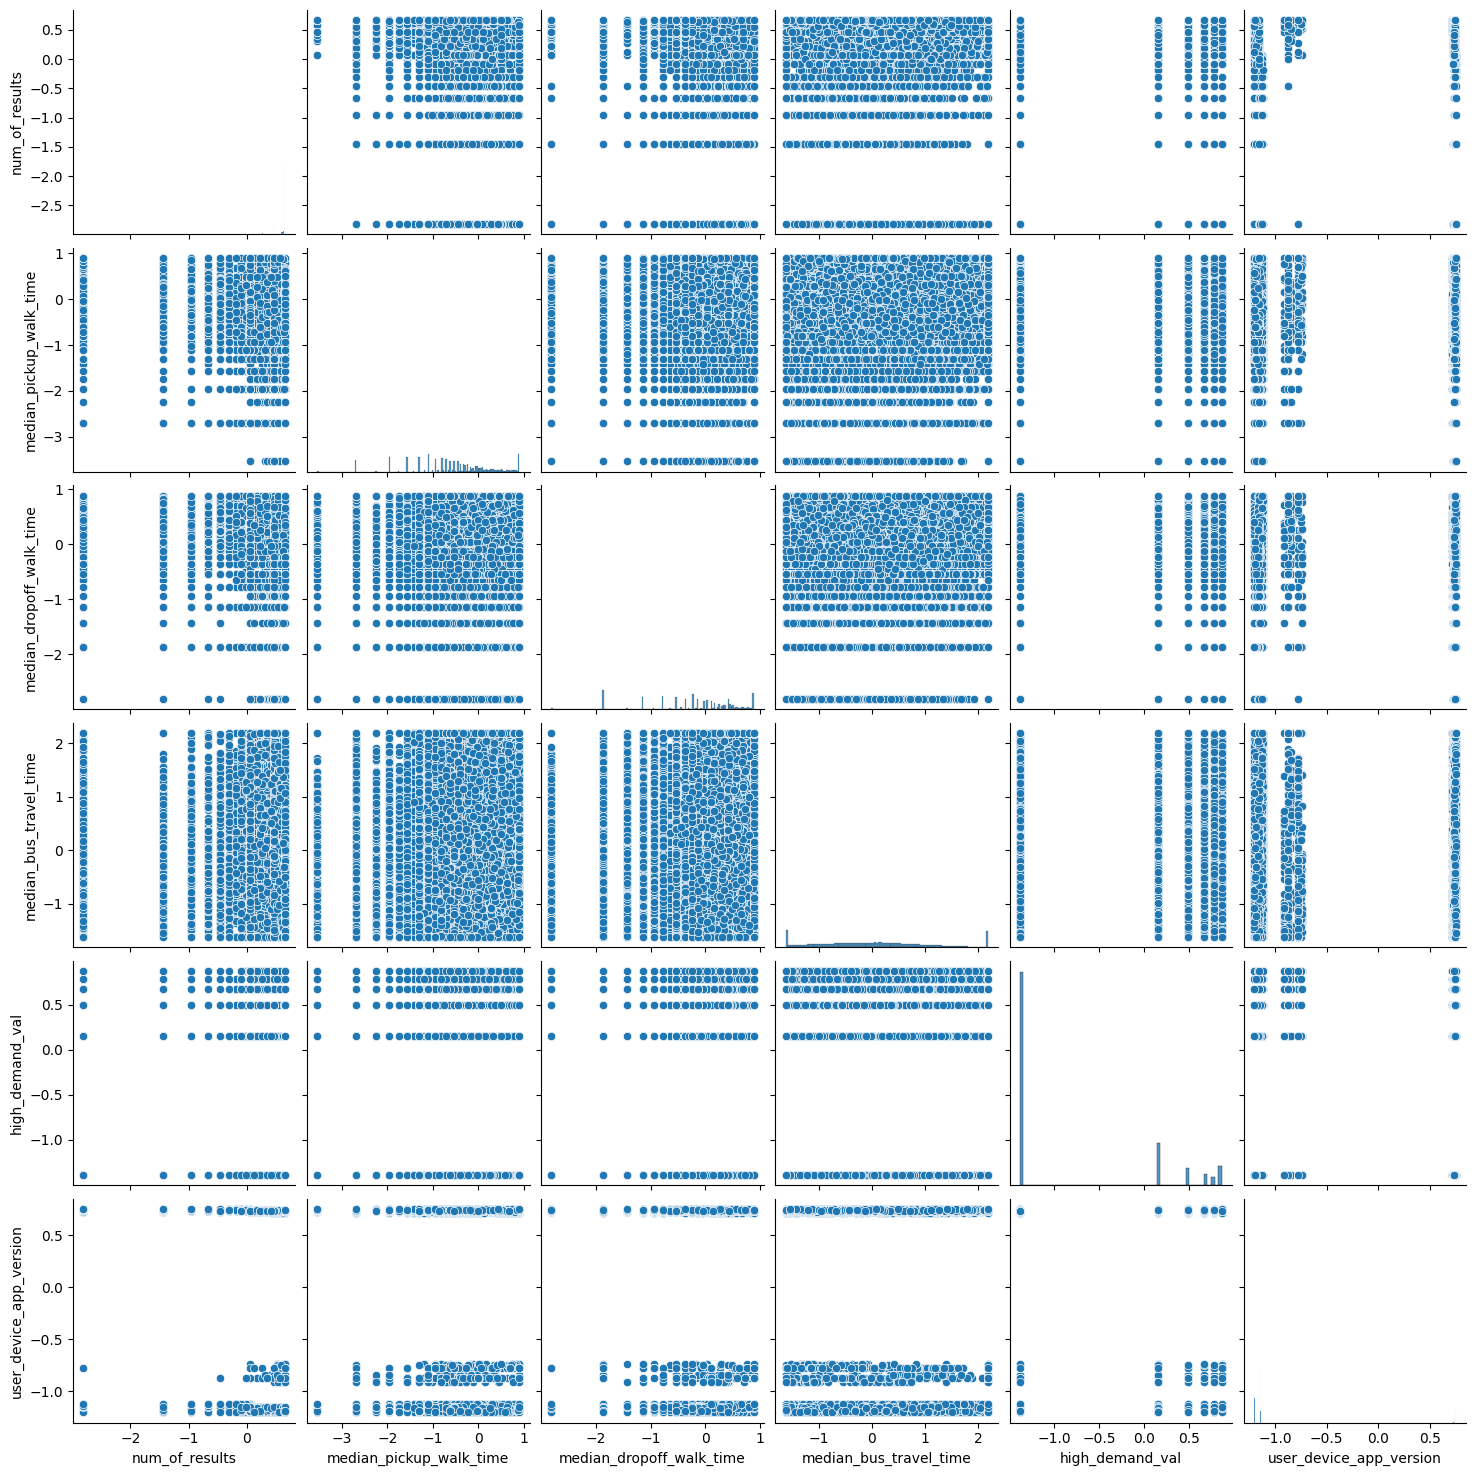

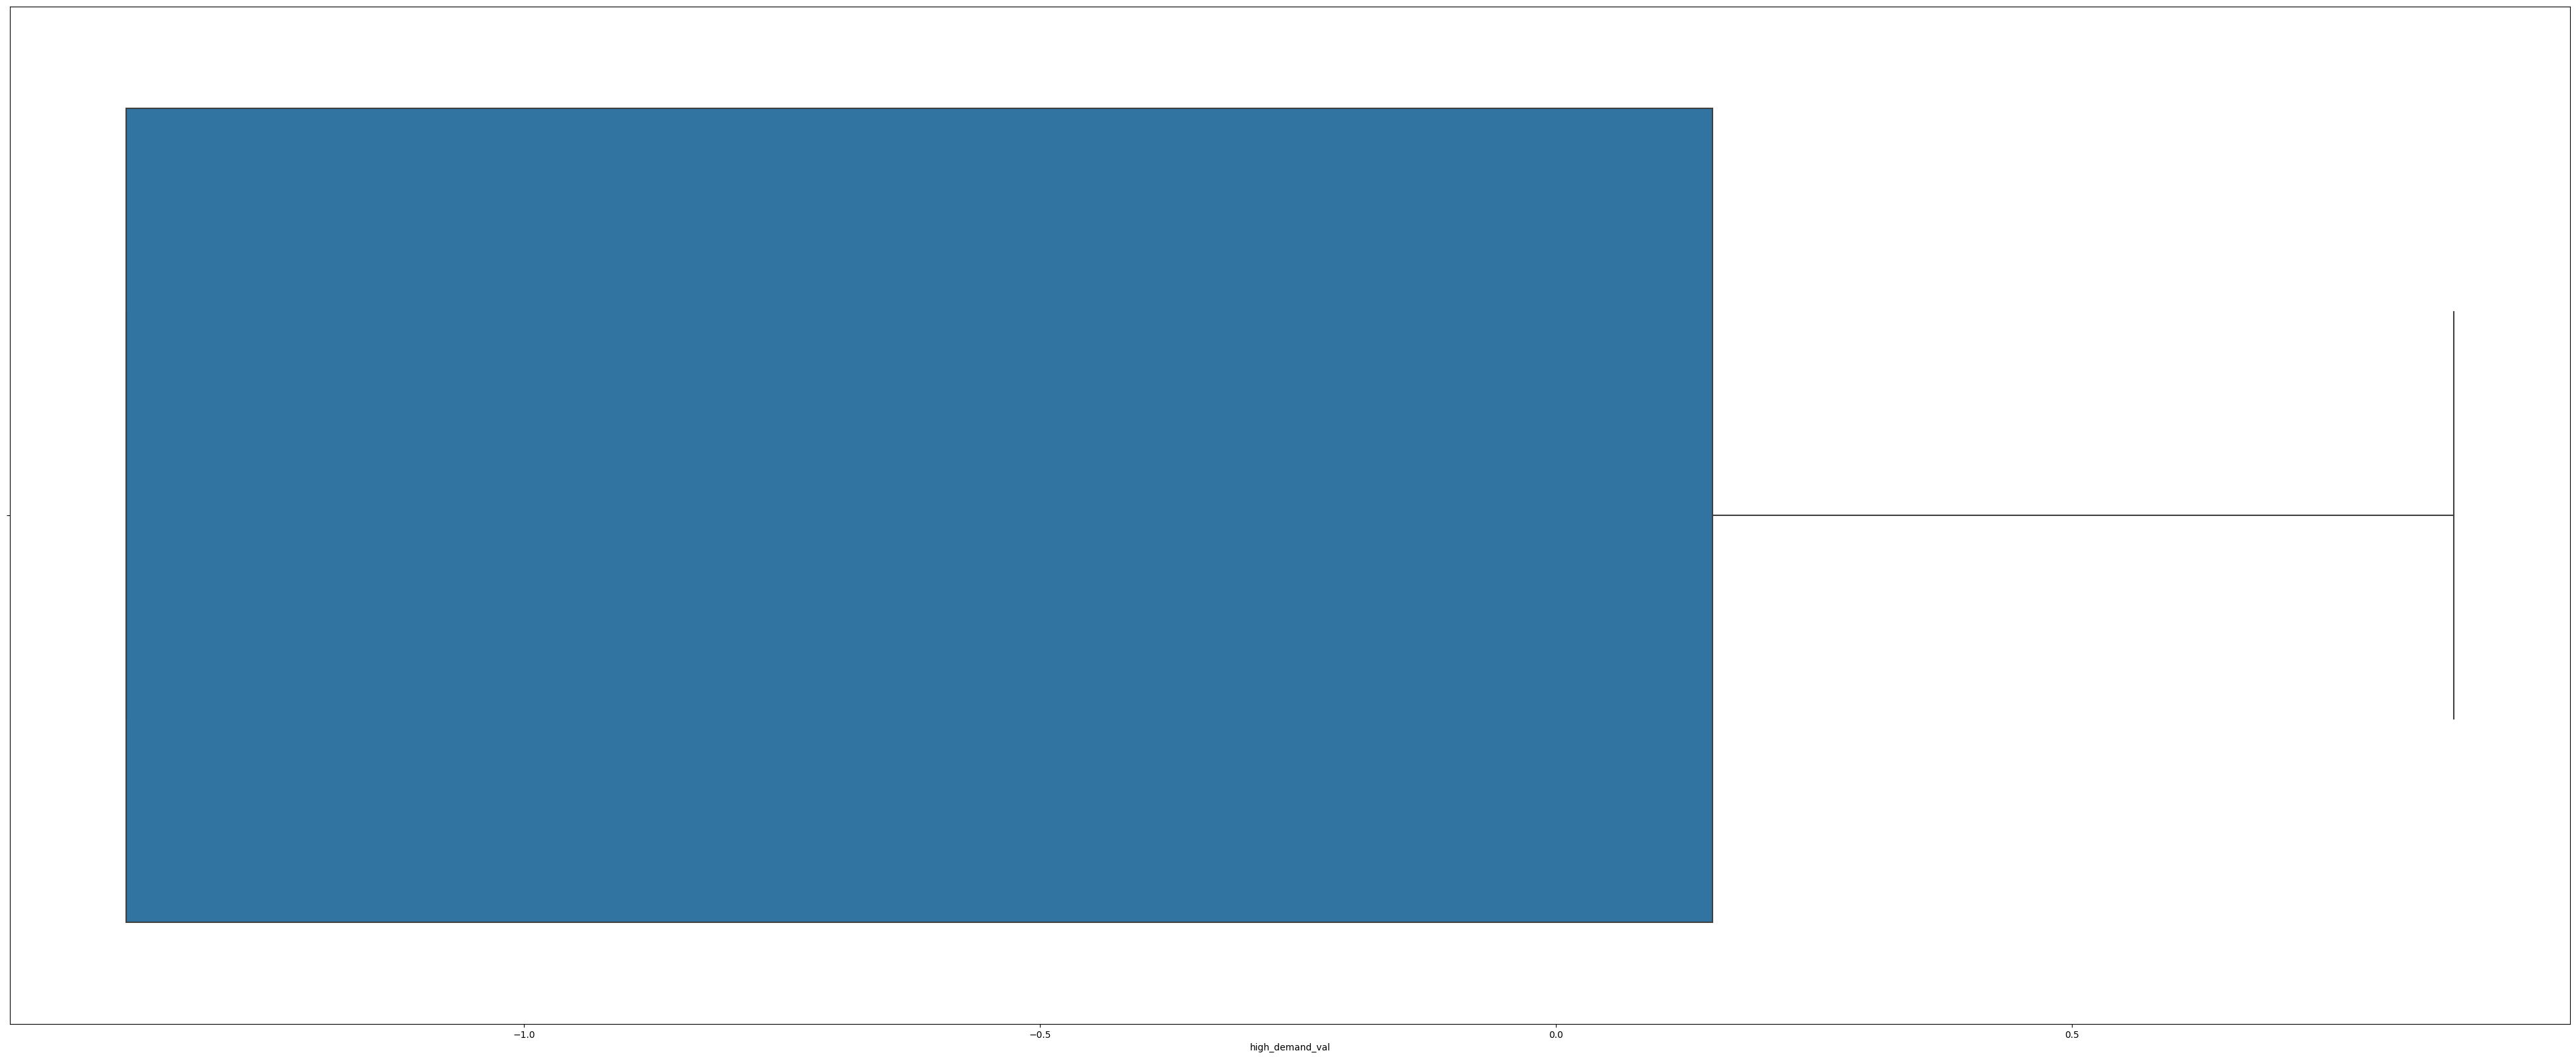

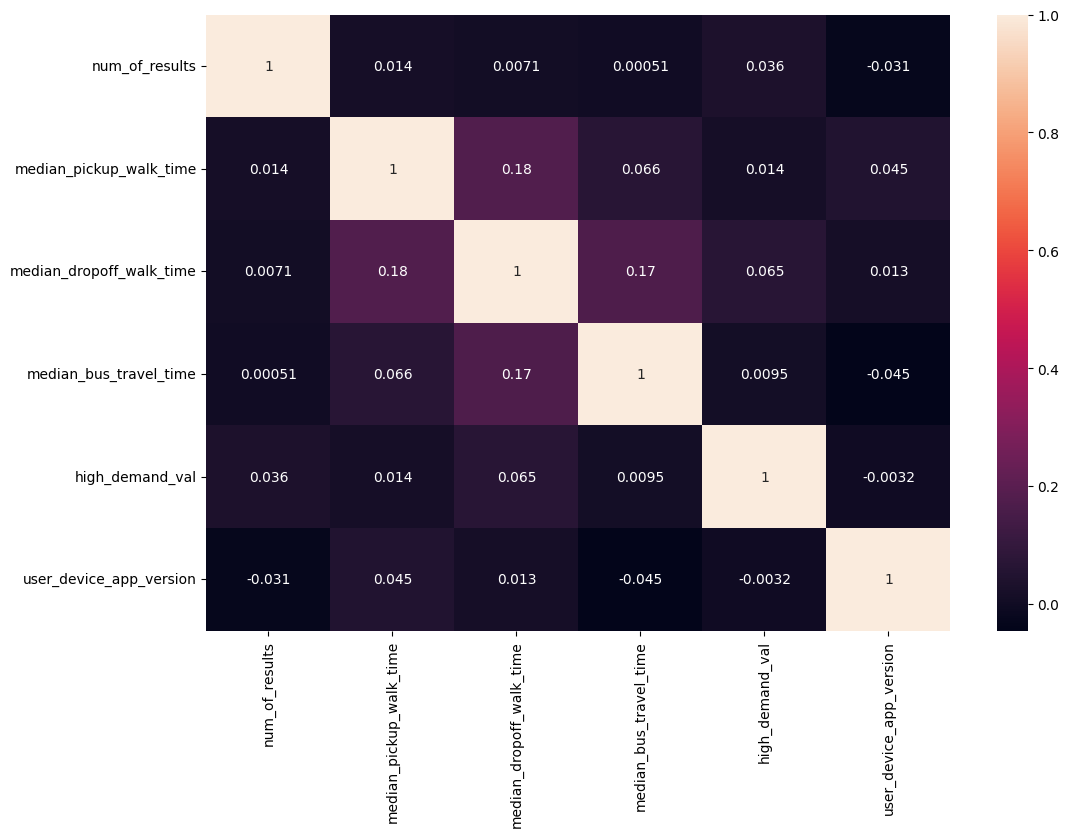

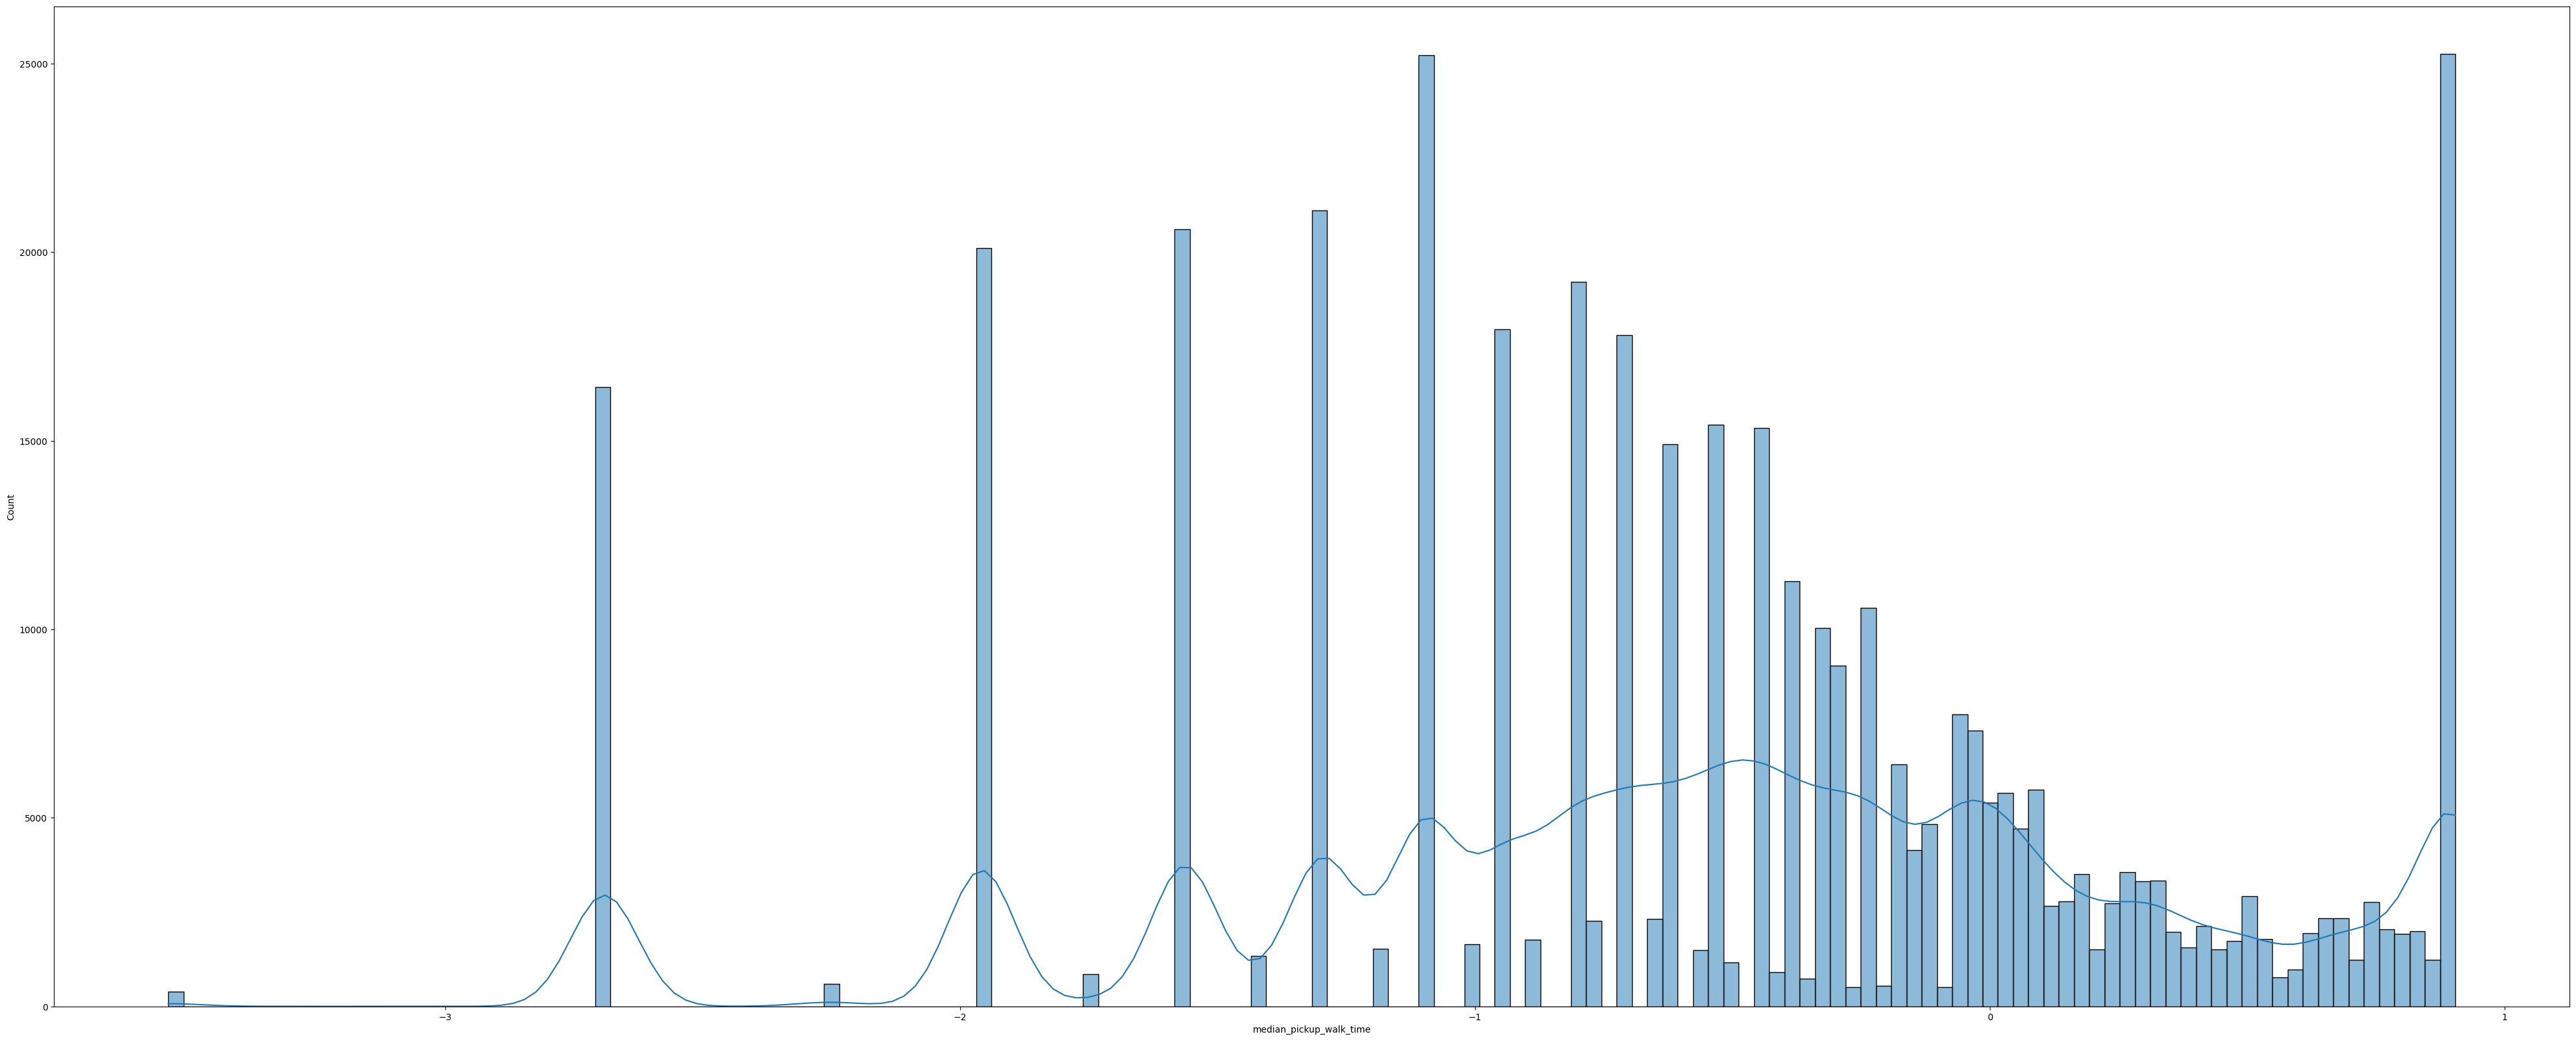

In [ ]:
# Pairplot to visualize relationships between numeric features
sns.pairplot(df_sample)
plt.show()

# Boxplot to visualize the distribution of a specific feature
sns.boxplot(x='high_demand_val', data=df_sample)
plt.show()

# Heatmap to visualize the correlation between features
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_sample.corr(), ax=ax, annot=True)
plt.show()

# Histogram to visualize the distribution of a specific feature
sns.histplot(df_sample['median_pickup_walk_time'], kde=True)
plt.show()

##**Conclusion**

In conclusion, the feature engineering process involved several key steps aimed at enhancing the dataset for improved model performance and interpretability.

1. Handling Missing Values:

Addressed missing values in the dataset, using appropriate techniques such as imputation or removal, depending on the nature of the missing data. This ensures a more complete and reliable dataset.

2. Dealing with Outliers:

Utilized winsorization to handle outliers in numeric features. Winsorization involves limiting extreme values to be within a specified range, reducing the impact of outliers on model performance.

3. Normalization of Numeric Features:

Applied normalization using StandardScaler to ensure that numeric features are on a similar scale. This step is essential for models that are sensitive to the scale of input features, promoting better convergence and performance.

4. Logarithmic Transformation for Skewed Numeric Features:

Addressed skewness in numeric features through logarithmic transformations. Skewed data can negatively impact the performance of certain models, and the logarithmic transformation helps in achieving a more symmetric distribution.

5. Feature Creation:

Created new features to capture additional information and patterns in the data. Techniques such as interaction terms, polynomial features, binning, and aggregation were applied based on the nature of the data and the problem domain.

Time-Based Features:

Extracted time-based features, including day of the week, month, and year, from timestamp data. This is particularly relevant when dealing with time series data, allowing models to capture temporal patterns.

6. Visualization:

Employed various visualization techniques to gain insights into the distribution of features and relationships between them. Visualizations such as pairplots, boxplots, heatmaps, and histograms were used to explore patterns and guide further analysis.

The decisions made in these feature engineering steps were driven by a combination of domain knowledge, statistical considerations, and the specific requirements of the machine learning task at hand. Each step aimed to address challenges in the data, improve the quality of features, and prepare the dataset for effective model training and evaluation. The iterative nature of feature engineering involves continuous refinement based on insights gained from the data exploration process.